<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Library Declaration:**

In [ ]:
# Importing the Keras libraries and packages
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

**Unzipping and Loading Dataset to the Console:**

In [ ]:
!unzip "/content/drive/MyDrive/Machine Learning/cats_and_dogs_filtered.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.10.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.100.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.101.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.102.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.103.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.104.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.105.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.106.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.107.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.108.jpg  
  inflating: /conten

**Data Loading:**

In [ ]:
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

**Setting Model Parameters:**

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

**Model Creation:**

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(2, 2))

In [ ]:
# Step 1 & 2 with more hidden layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

In [ ]:
# Step 3 - Dropout
classifier.add(Dropout(0.5))

Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 4 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 5 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Data Augmentation and Preparation:**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
training_set = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
validation_set = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


**Train the Model:**

In [ ]:
epochs=10
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 20s 1s/step - loss: 0.6944 - accuracy: 0.4980 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 20s 992ms/step - loss: 0.6919 - accuracy: 0.5240 - val_loss: 0.6901 - val_accuracy: 0.5030
Epoch 3/10
20/20 [==============================] - 20s 993ms/step - loss: 0.6872 - accuracy: 0.5480 - val_loss: 0.6574 - val_accuracy: 0.6200
Epoch 4/10
20/20 [==============================] - 20s 991ms/step - loss: 0.6754 - accuracy: 0.5650 - val_loss: 0.6527 - val_accuracy: 0.6220
Epoch 5/10
20/20 [==============================] - 20s 992ms/step - loss: 0.6810 - accuracy: 0.5640 - val_loss: 0.6641 - val_accuracy: 0.5690
Epoch 6/10
20/20 [==============================] - 20s 996ms/step - loss: 0.6606 - accuracy: 0.5980 - val_loss: 0.6456 - val_accuracy: 0.6310
Epoch 7/10
20/20 [==============================] - 20s 992ms/step - loss: 0.6493 - accuracy: 0.6180 - val_loss: 0.6201 - val_accuracy: 0.6390
Ep

**Training Result Visualization:**

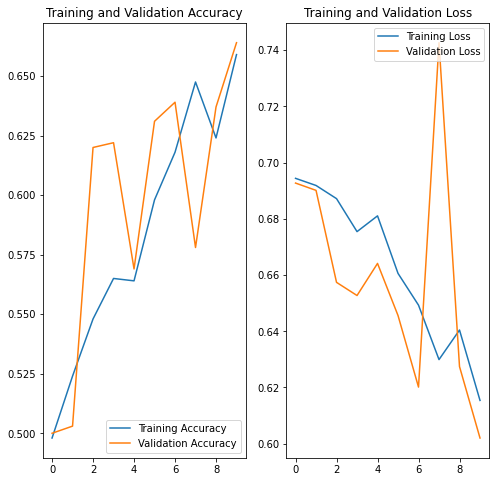

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()